## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
warnings.filterwarnings("ignore")

#### We have multiple datasets so we will import them first then we will merge them into one table and perform our EDA on it.

In [4]:
Fact_Table = pd.read_csv("Fact_Steam_Games.csv")
dim_lang = pd.read_csv("Dim_Language.csv")
dim_cat = pd.read_csv("Dim_Category.csv")
dim_os = pd.read_csv("Dim_OS.csv")
dim_genre = pd.read_csv("Dim_Genres.csv")

In [5]:
Fact_Table.head()

,AppID,Name,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Unnamed: 11,Unnamed: 12
0,20200.0,Galactic Bowling,21-10-2008,10000.0,19.99,0.0,6.0,11.0,30.0,Perpetual FX Creative,Perpetual FX Creative,NaN,NaN
1,655370.0,Train Bandit,12-10-2017,10000.0,0.99,0.0,53.0,5.0,12.0,Rusty Moyher,Wild Rooster,NaN,NaN
2,1732930.0,Jolt Project,17-11-2021,10000.0,4.99,0.0,0.0,0.0,0.0,Campião Games,Campião Games,NaN,NaN
3,1355720.0,Henosis™,23-07-2020,10000.0,5.99,0.0,3.0,0.0,0.0,Odd Critter Games,Odd Critter Games,NaN,NaN
4,1139950.0,Two Weeks in Painland,03-02-2020,10000.0,0.00,0.0,50.0,8.0,17.0,Unusual Games,Unusual Games,NaN,NaN


In [6]:
games = pd.merge(Fact_Table,dim_cat, on="AppID",how="inner")
games = pd.merge(games,dim_lang, on="AppID",how="inner")
games = pd.merge(games,dim_os, on="AppID",how="inner")
games = pd.merge(games,dim_genre, on="AppID",how="inner")

In [7]:
games.head()

,AppID,Name,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,...,language_1,language_2,language_3,language_4,Windows,Mac,Linux,Genre_1,Genre_2,Genre_3
0,20200.0,Galactic Bowling,21-10-2008,10000.0,19.99,0.0,6.0,11.0,30.0,Perpetual FX Creative,...,English,NaN,NaN,NaN,True,False,False,Casual,Indie,Sports
1,655370.0,Train Bandit,12-10-2017,10000.0,0.99,0.0,53.0,5.0,12.0,Rusty Moyher,...,English,French,Italian,German,True,True,False,Action,Indie,NaN
2,1732930.0,Jolt Project,17-11-2021,10000.0,4.99,0.0,0.0,0.0,0.0,Campião Games,...,English,Portuguese - Brazil,NaN,NaN,True,False,False,Action,Adventure,Indie
3,1355720.0,Henosis™,23-07-2020,10000.0,5.99,0.0,3.0,0.0,0.0,Odd Critter Games,...,English,French,Italian,German,True,True,True,Adventure,Casual,Indie
4,1139950.0,Two Weeks in Painland,03-02-2020,10000.0,0.00,0.0,50.0,8.0,17.0,Unusual Games,...,English,Spanish - Spain,NaN,NaN,True,True,False,Adventure,Indie,NaN


#### Now that we have merged every table we need to extract the columns that we are going to use in our analysis.

In [9]:
games.columns

Index(['AppID', 'Name', 'Relesed_Date', 'Estimated_Owners', 'Price',
       'DLC_count', 'Positive', 'Negative', 'Achievements', 'Developers',
       'Publishers', 'Unnamed: 11', 'Unnamed: 12', 'Category_1', 'Category_2',
       'language_1', 'language_2', 'language_3', 'language_4', 'Windows',
       'Mac', 'Linux', 'Genre_1', 'Genre_2', 'Genre_3'],
      dtype='object')

In [10]:
steam_games = games[['AppID', 'Name', 'Relesed_Date', 'Estimated_Owners', 'Price',
       'DLC_count', 'Positive', 'Negative', 'Achievements', 'Developers',
       'Publishers', 'Category_1', 'language_1', 'Windows', 'Mac', 'Linux', 'Genre_1'
                    ]]

#### Renaming the columns that we are gonna use for our better analysis.

In [12]:
steam_games.rename(columns={"Category_1":"Category","Genre_1":"Genre","language_1":"Language","Name":"Games"},inplace=True)

## EXPLORATORY DATA ANALYSIS

In [14]:
steam_games.head()

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre
0,20200.0,Galactic Bowling,21-10-2008,10000.0,19.99,0.0,6.0,11.0,30.0,Perpetual FX Creative,Perpetual FX Creative,Single-player,English,True,False,False,Casual
1,655370.0,Train Bandit,12-10-2017,10000.0,0.99,0.0,53.0,5.0,12.0,Rusty Moyher,Wild Rooster,Single-player,English,True,True,False,Action
2,1732930.0,Jolt Project,17-11-2021,10000.0,4.99,0.0,0.0,0.0,0.0,Campião Games,Campião Games,Single-player,English,True,False,False,Action
3,1355720.0,Henosis™,23-07-2020,10000.0,5.99,0.0,3.0,0.0,0.0,Odd Critter Games,Odd Critter Games,Single-player,English,True,True,True,Adventure
4,1139950.0,Two Weeks in Painland,03-02-2020,10000.0,0.00,0.0,50.0,8.0,17.0,Unusual Games,Unusual Games,Single-player,English,True,True,False,Adventure


In [15]:
steam_games.tail()

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre
71709,2159120.0,SUR5,01-04-2023,0.0,0.00,0.0,0.0,0.0,6.0,Katharsis,Katharsis,Single-player,English,True,False,False,Free to Play
71710,2125160.0,Prison Life 2,30-03-2023,10000.0,10.79,0.0,9.0,1.0,83.0,AO Games,AO Games,Single-player,English,True,False,False,Casual
71711,2318860.0,Architecture Zeitgeist,27-03-2023,10000.0,5.99,0.0,1.0,0.0,3.0,Matheus Rudo,Rudo Studios,Single-player,English,True,False,False,Casual
71712,2180330.0,Girl's Way to Survive 2: Bloody Museum,02-04-2023,0.0,2.39,0.0,0.0,0.0,0.0,绅士游戏工坊,绅士游戏工坊,Single-player,Simplified Chinese,True,False,False,Action
71713,2352890.0,Hentai Ariel,30-03-2023,10000.0,0.74,0.0,0.0,0.0,30.0,Cyber Keks,Cyber Keks,Single-player,English,True,False,False,Casual


In [16]:
steam_games.sample(5)

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre
4438,1386110.0,Xentron Attack,11-09-2020,35000.0,0.99,0.0,3.0,0.0,16.0,Hijong Park,PsychoFlux Entertainment,Single-player,English,True,False,False,Action
68288,2265020.0,Dark Desire Mute 1,14-01-2023,0.0,0.00,0.0,0.0,0.0,7.0,CodeRenderX,CodeRenderX,Single-player,English,True,False,True,Simulation
31200,1658450.0,GrubDash Driver: Food Delivery Driver Simulator,23-03-2022,10000.0,7.99,1.0,5.0,3.0,75.0,EF Universe Games LLC,EF Universe Games LLC,Single-player,English,True,False,False,Casual
70283,2292740.0,In & Out Alive,02-03-2023,10000.0,6.99,0.0,0.0,0.0,3.0,Kordsky,Kordsky,Single-player,English,True,False,False,Action
38764,656060.0,SkiFy,24-01-2018,10000.0,1.99,0.0,10.0,9.0,0.0,Blup Games,Back To Basics Gaming,Single-player,English,True,False,False,Casual


In [17]:
steam_games.shape

(71714, 17)

In [18]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71714 entries, 0 to 71713
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             71714 non-null  float64
 1   Games             71714 non-null  object 
 2   Relesed_Date      71590 non-null  object 
 3   Estimated_Owners  71714 non-null  float64
 4   Price             71714 non-null  float64
 5   DLC_count         71714 non-null  float64
 6   Positive          71714 non-null  float64
 7   Negative          71714 non-null  float64
 8   Achievements      71714 non-null  float64
 9   Developers        71711 non-null  object 
 10  Publishers        71662 non-null  object 
 11  Category          71714 non-null  object 
 12  Language          71714 non-null  object 
 13  Windows           71714 non-null  bool   
 14  Mac               71714 non-null  bool   
 15  Linux             71714 non-null  bool   
 16  Genre             71714 non-null  object

In [19]:
steam_games['Relesed_Date'] = pd.to_datetime(steam_games['Relesed_Date'])

In [20]:
steam_games.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
AppID,71714.0,1.199235e+06,5.982243e+05,10.0,700545.00,1176790.00,1692265.00,2379920.0
Estimated_Owners,71714.0,9.767089e+04,1.115872e+06,0.0,10000.00,10000.00,10000.00,150000000.0
Price,71714.0,7.220468e+00,1.104875e+01,0.0,0.99,4.99,9.99,999.0
DLC_count,71714.0,6.154029e-01,1.493306e+01,0.0,0.00,0.00,0.00,2366.0
Positive,71714.0,1.114784e+03,2.652283e+04,0.0,1.00,9.00,59.00,5764420.0
Negative,71714.0,1.821206e+02,4.975275e+03,0.0,0.00,3.00,18.00,895978.0
Achievements,71714.0,2.164258e+01,1.855861e+02,0.0,0.00,1.00,19.00,9821.0


In [21]:
steam_games.describe(include='object').T

,count,unique,top,freq
Games,71714,71169,Shadow of the Tomb Raider: Definitive Edition,20
Developers,71711,41156,Unknown,2457
Publishers,71662,36045,Unknown,2667
Category,71714,26,Single-player,64927
Language,71714,37,English,64918
Genre,71714,28,Action,28462


In [22]:
steam_games.isnull().sum()

AppID                 0
Games                 0
Relesed_Date        124
Estimated_Owners      0
Price                 0
DLC_count             0
Positive              0
Negative              0
Achievements          0
Developers            3
Publishers           52
Category              0
Language              0
Windows               0
Mac                   0
Linux                 0
Genre                 0
dtype: int64

## DATA ANALYSIS AND VISUALIZATION

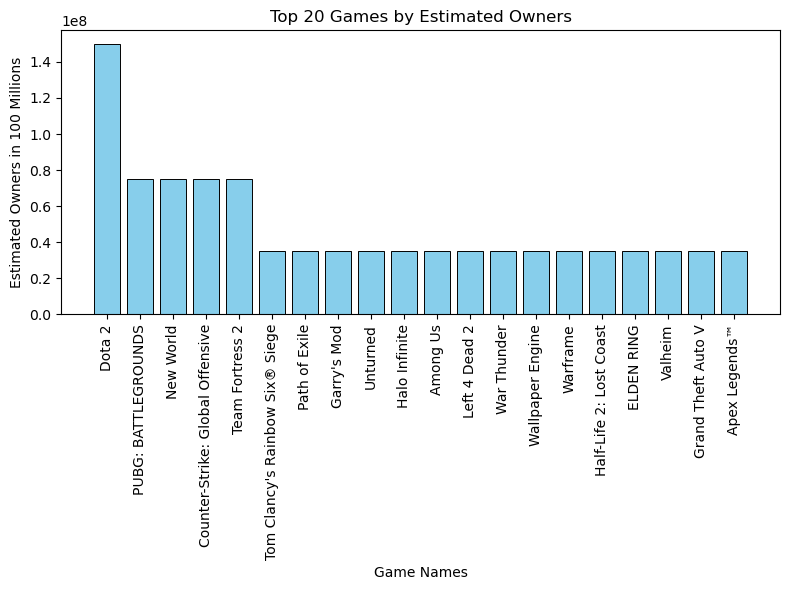

In [24]:
result = steam_games.groupby("Games")["Estimated_Owners"].sum().sort_values(ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(result.index, result.values, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel("Game Names")
plt.ylabel("Estimated Owners in 100 Millions")
plt.title("Top 20 Games by Estimated Owners")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()

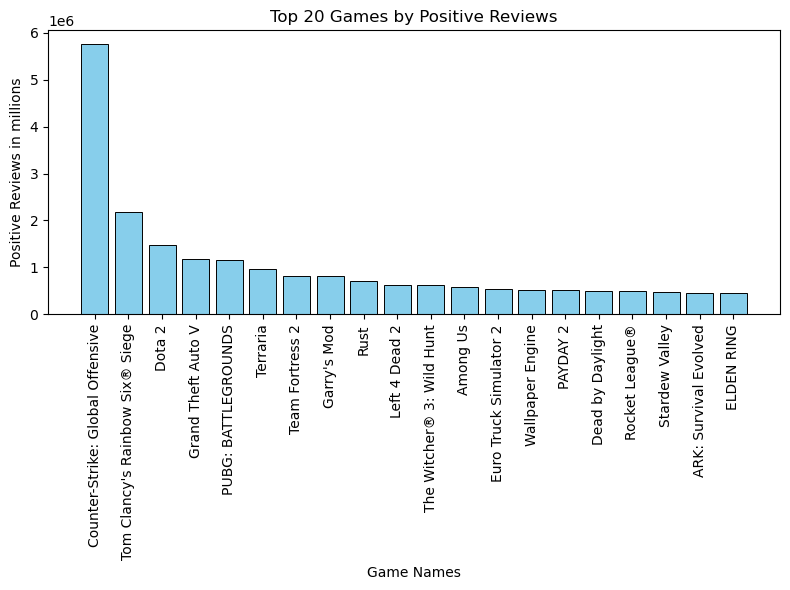

In [25]:
#  What are the top 10 games with the highest number of positive reviews?
Graph = steam_games.groupby("Games")["Positive"].sum().sort_values(ascending=False).head(20)
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(Graph.index, Graph.values, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel("Game Names")
plt.ylabel("Positive Reviews in millions")
plt.title("Top 20 Games by Positive Reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

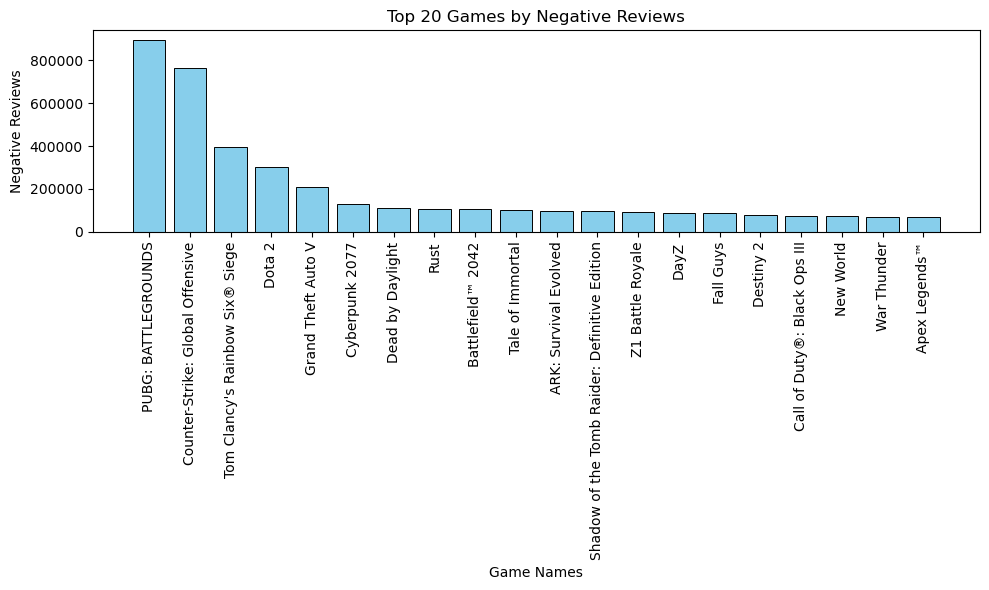

In [26]:
#  What are the top 10 games with the highest number of negative reviews?
Graph = steam_games.groupby("Games")["Negative"].sum().sort_values(ascending=False).head(20)
# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(Graph.index, Graph.values, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel("Game Names")
plt.ylabel("Negative Reviews")
plt.title("Top 20 Games by Negative Reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.savefig("Top_10_Games_by_Negative_Reviews.jpg")

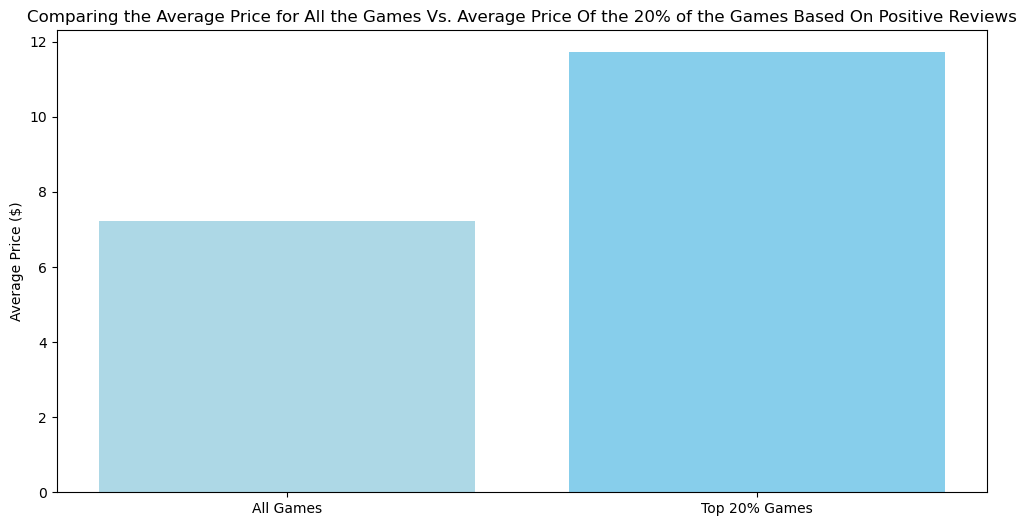

In [27]:
# Calculate the average price of all games
average_price_of_games = steam_games['Price'].mean()

# Determine the threshold for the top 20%
top_20_percent = steam_games['Positive'].quantile(0.80)

# Filter the top 20% of games based on estimated owners
top_20_percent_games = steam_games[steam_games['Positive'] >= top_20_percent]

# Calculate the average price of the top 20% games
average_price_top_20_percent = top_20_percent_games['Price'].mean()

# Prepare data for plotting
categories = ['All Games', 'Top 20% Games']
average_prices = [average_price_of_games, average_price_top_20_percent]

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(categories, average_prices, color=['lightblue', 'skyblue'])
plt.ylabel('Average Price ($)')
plt.title('Comparing the Average Price for All the Games Vs. Average Price Of the 20% of the Games Based On Positive Reviews')
plt.savefig("Renamed.jpg")

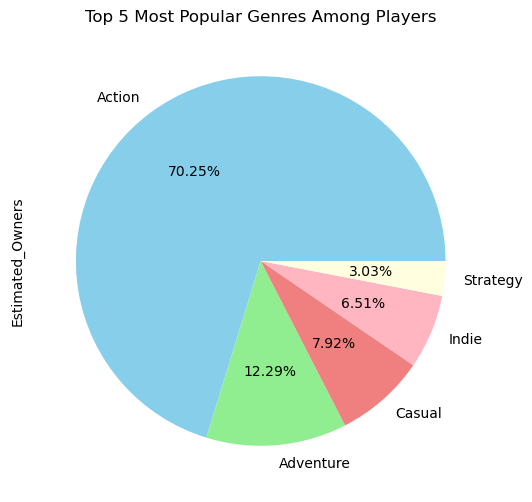

<Figure size 640x480 with 0 Axes>

In [28]:
# Which genres are the most popular among players?
genres = steam_games.groupby("Genre")["Estimated_Owners"].sum().sort_values(ascending=False)
# Ploting the Output
plt.figure(figsize=(12, 6))
genres.head(5).plot(kind='pie',autopct='%0.2f%%',colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])

plt.title('Top 5 Most Popular Genres Among Players')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig("Top_5_Most_Popular_Genres_Among_Players.jpg")

Text(0.5, 1.0, 'Single Players VS. Multiple Players')

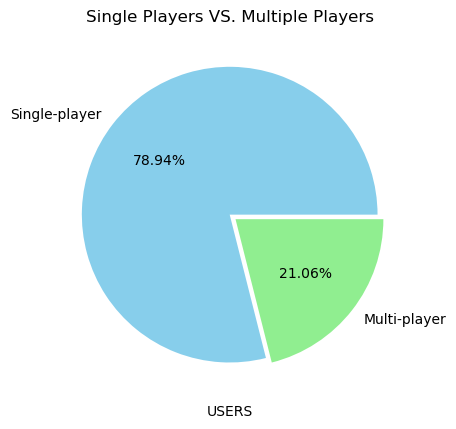

In [29]:
category  = steam_games.groupby("Category")["Estimated_Owners"].sum().sort_values(ascending=False).head(2)
category.plot(kind="pie",autopct="%0.2f%%",colors=["skyblue",'lightgreen'],explode=[0,0.05])
plt.ylabel("")
plt.xlabel("USERS")
plt.title("Single Players VS. Multiple Players")

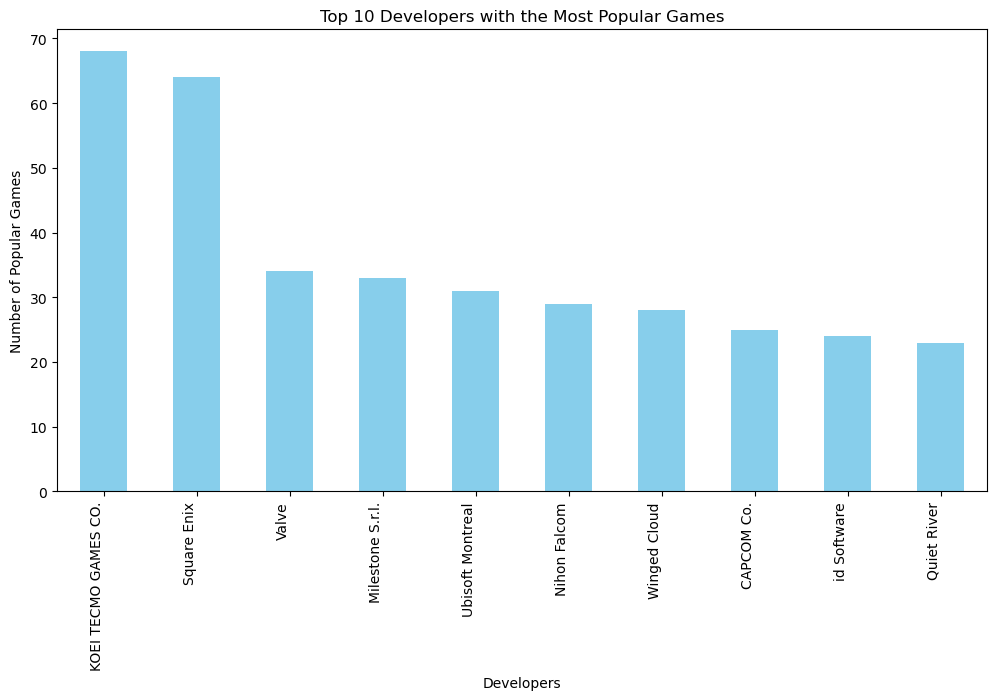

In [30]:
# Which developers have the most popular games?
# Count The Number Of Popular Games per Developer.
Dev_Popularity = top_20_percent_games["Developers"].value_counts()
# Plotting the top 10 developers with the most popular games
plt.figure(figsize=(12, 6))
Dev_Popularity.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Developers')
plt.ylabel('Number of Popular Games')
plt.title('Top 10 Developers with the Most Popular Games')
plt.xticks(rotation=90, ha='right')
plt.show()


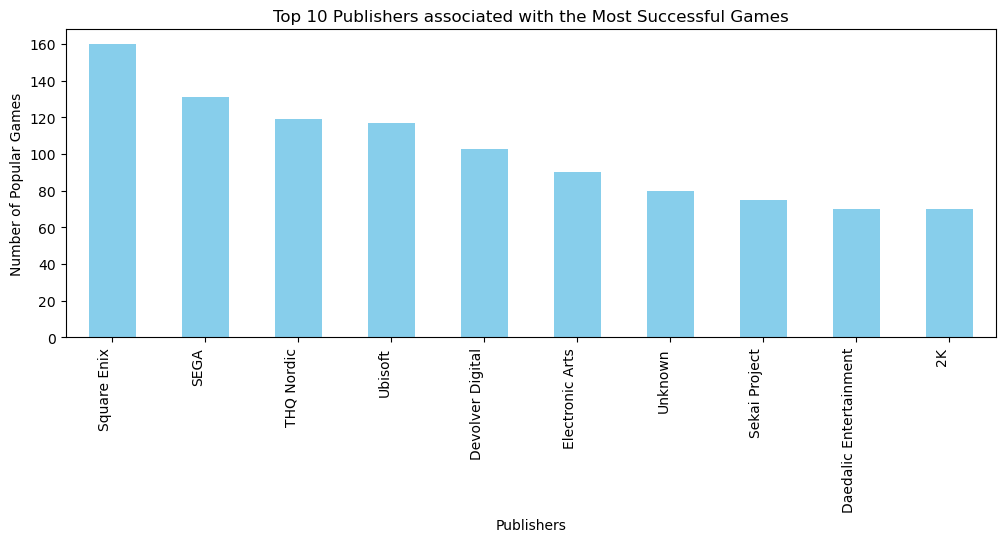

<Figure size 640x480 with 0 Axes>

In [31]:
# Count The Number Of Popular Games By Publishers.
Pub_Popularity = top_20_percent_games["Publishers"].value_counts()
# Plotting the top 10 developers with the most popular games
plt.figure(figsize=(12, 4))
Pub_Popularity.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Publishers')
plt.ylabel('Number of Popular Games')
plt.title('Top 10 Publishers associated with the Most Successful Games')
plt.xticks(rotation=90, ha='right')
plt.show()
plt.savefig("Top_10_Publishers_associated_with_the_Most_Successful_Games.jpg")

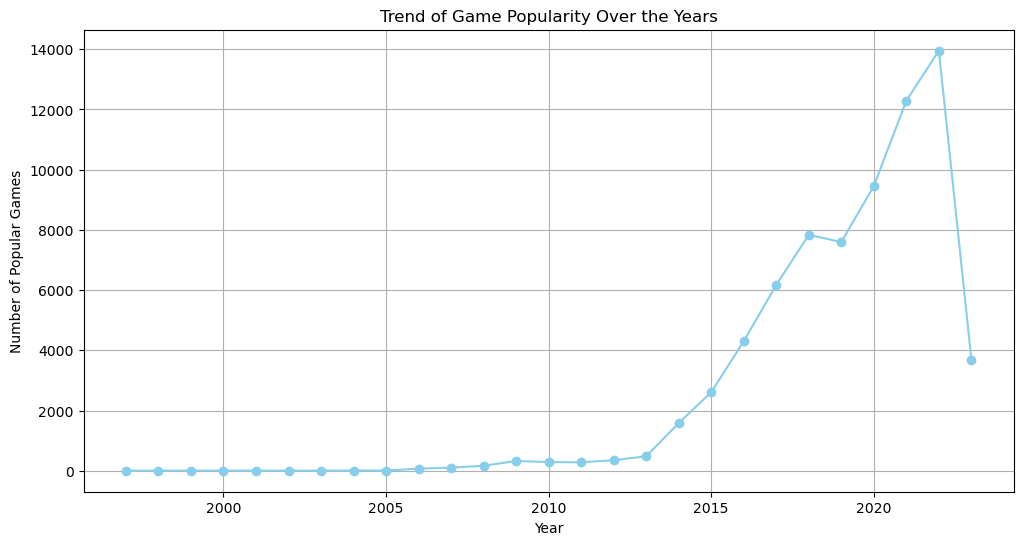

In [32]:
steam_games_up_to_2023 = steam_games[steam_games['Relesed_Date'].dt.year <= 2023]

# Count the number of popular games released each year up to 2023
popular_games_per_year = steam_games_up_to_2023['Relesed_Date'].dt.year.value_counts().sort_index()

# Plotting the trend of game popularity over the years
plt.figure(figsize=(12, 6))
popular_games_per_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Popular Games')
plt.title('Trend of Game Popularity Over the Years')
plt.grid(True)
plt.show()


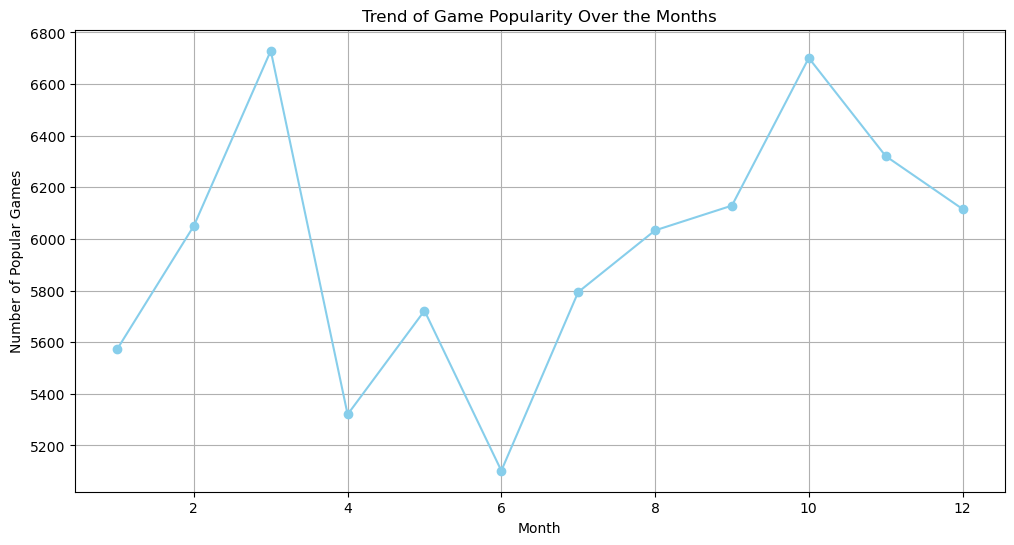

<Figure size 640x480 with 0 Axes>

In [33]:
# Count the number of popular games released each year
popular_games_per_year = steam_games['Relesed_Date'].dt.month.value_counts().sort_index()

# Plotting the trend of game popularity over the years
plt.figure(figsize=(12, 6))
popular_games_per_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Popular Games')
plt.title('Trend of Game Popularity Over the Months')
plt.grid(True)
plt.show()
plt.savefig("Trend_of_Game_Popularity_Over_the_Months.jpg")

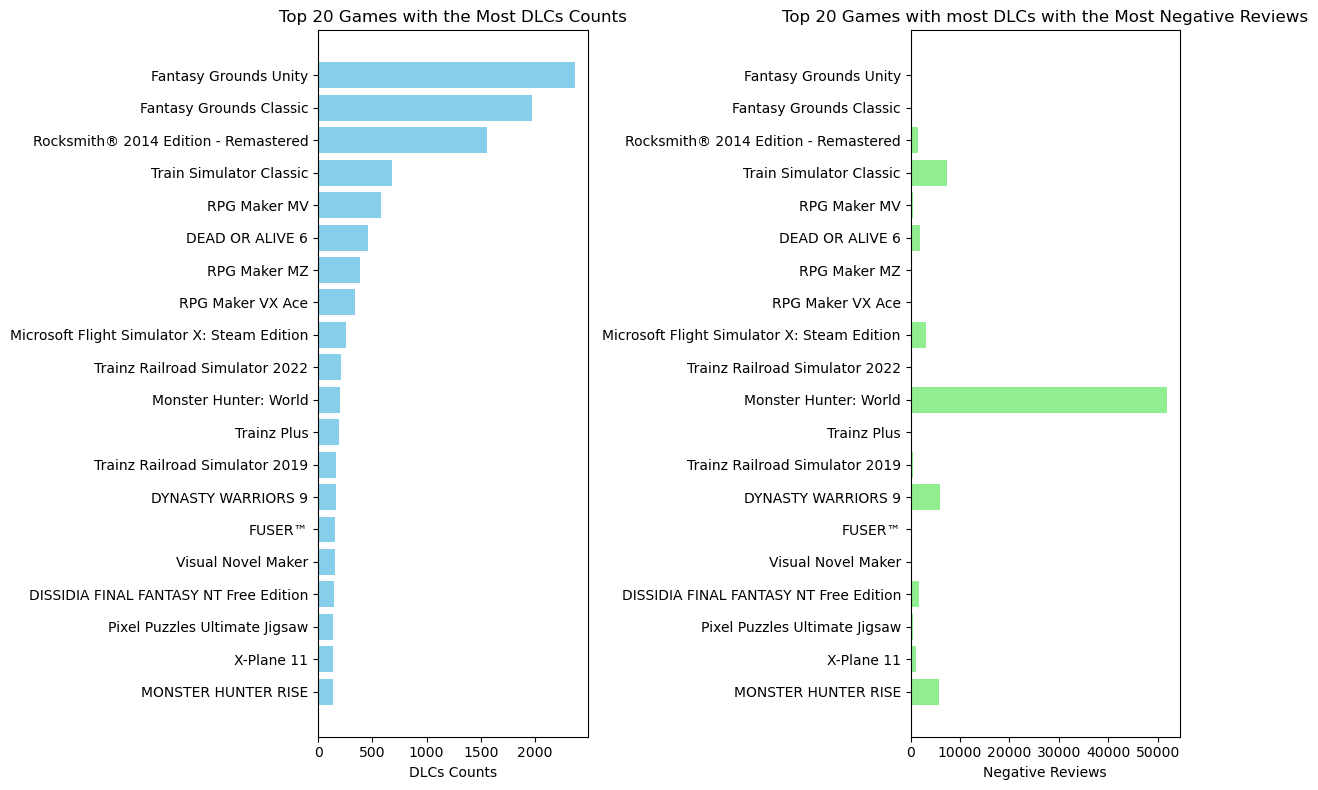

In [34]:
games_with_most_dlcs = steam_games.sort_values(by='DLC_count', ascending=False)

# Select the top 20 games with the most DLCs
top_games_with_most_dlcs = games_with_most_dlcs.head(24)

plt.figure(figsize=(12, 8))

# Bar chart for number of DLCs
plt.subplot(1, 2, 1)
plt.barh(top_games_with_most_dlcs['Games'], top_games_with_most_dlcs['DLC_count'], color='skyblue')
plt.xlabel('DLCs Counts')
plt.title('Top 20 Games with the Most DLCs Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the game with most DLCs at the top

# Bar chart for estimated owners of these games
plt.subplot(1, 2, 2)
plt.barh(top_games_with_most_dlcs['Games'], top_games_with_most_dlcs['Negative'], color='lightgreen')
plt.xlabel('Negative Reviews')
plt.title('Top 20 Games with most DLCs with the Most Negative Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to match the first plot

plt.tight_layout()
plt.show()


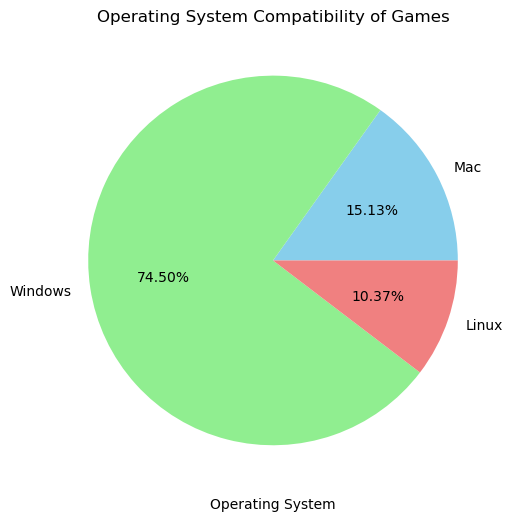

<Figure size 640x480 with 0 Axes>

In [35]:
compatible_counts = steam_games[['Mac', 'Windows', 'Linux']].sum()

# Plotting the OS compatibility
plt.figure(figsize=(8, 6))
compatible_counts.plot(kind='pie', colors=['skyblue', 'lightgreen', 'lightcoral'],autopct="%0.2f%%")
plt.xlabel('Operating System')
plt.title('Operating System Compatibility of Games')
plt.xticks(rotation=0)
plt.show()
plt.savefig('Operating_System_Compatibility_of_Games.jpg')

In [36]:
# Perform correlation analysis between number of supported OS and estimated owners
correlation_owners = steam_games[['Mac',"Windows",'Linux']].sum(axis=1).corr(steam_games['Estimated_Owners'])

# Perform correlation analysis between number of supported OS and positive reviews
correlation_reviews = steam_games[['Mac',"Windows",'Linux']].sum(axis=1).corr(steam_games['Positive'])

# Print the correlation results
print(f'Correlation between number of supported OS and estimated owners: {correlation_owners:.2f}')
print(f'Correlation between number of supported OS and positive reviews: {correlation_reviews:.2f}')

Correlation between number of supported OS and estimated owners: 0.05
Correlation between number of supported OS and positive reviews: 0.03


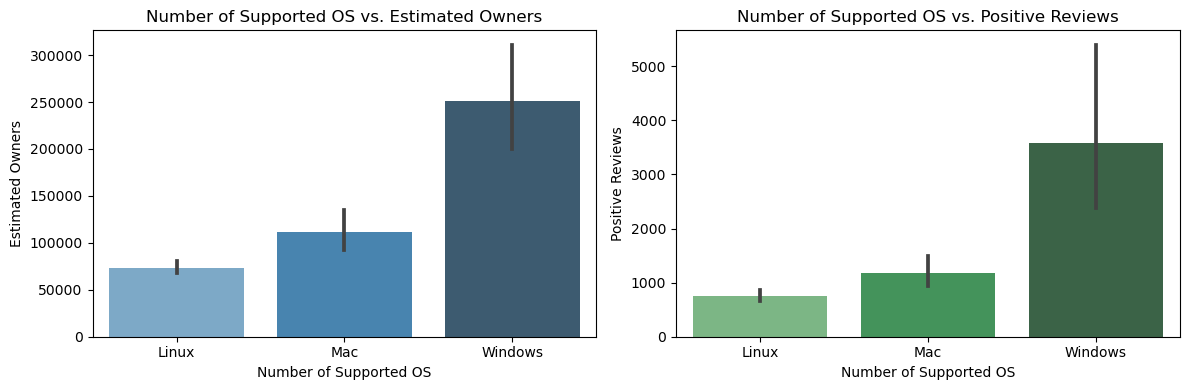

In [37]:
# Create a new column that sums the number of supported OS
steam_games['Num_Supported_OS'] = steam_games[['Mac', 'Windows', 'Linux']].sum(axis=1)

# Map the numeric values to meaningful labels
os_labels = {1: 'Linux', 2: 'Mac', 3: 'Windows'}
steam_games['Num_Supported_OS_Label'] = steam_games['Num_Supported_OS'].map(os_labels)

# Plotting the relationship between Number of Supported OS and Estimated Owners
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Num_Supported_OS_Label', y='Estimated_Owners', data=steam_games, palette='Blues_d')
plt.xlabel('Number of Supported OS')
plt.ylabel('Estimated Owners')
plt.title('Number of Supported OS vs. Estimated Owners')
plt.savefig("Number_of_supported_os_vs_Estimated_Owners.jpg")
# Plotting the correlation between Number of Supported OS and Positive Reviews
plt.subplot(1, 2, 2)
sns.barplot(x='Num_Supported_OS_Label', y='Positive', data=steam_games, palette='Greens_d')
plt.xlabel('Number of Supported OS')
plt.ylabel('Positive Reviews')
plt.title('Number of Supported OS vs. Positive Reviews')
plt.savefig("Number_of_supported_os_vs_positive_reviews.jpg")
plt.tight_layout()
plt.show()


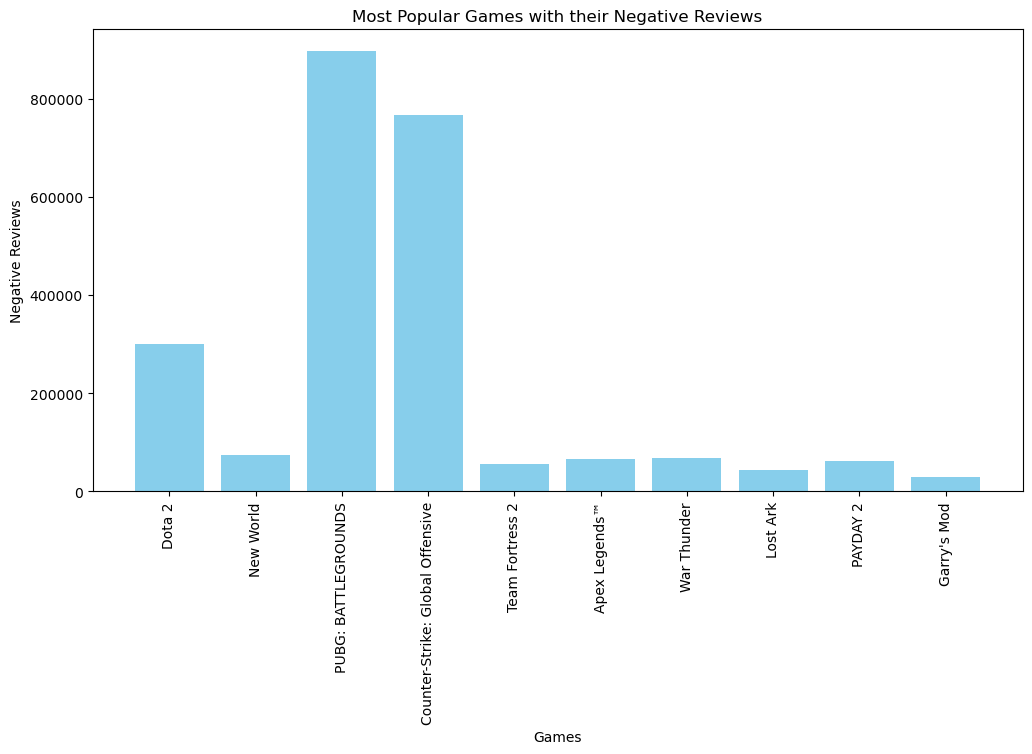

In [38]:
games_with_most_Users = steam_games.sort_values(by='Estimated_Owners', ascending=False)

# Select the top 10 games with the most DLCs
top_games_with_most_Users = games_with_most_Users.head(10)

plt.figure(figsize=(12, 6))

# Bar chart for number of DLCs

plt.bar(top_games_with_most_Users['Games'], top_games_with_most_Users['Negative'], color='skyblue')
plt.ylabel("Negative Reviews")
plt.xlabel('Games')
plt.title('Most Popular Games with their Negative Reviews')
plt.xticks(rotation=90)
plt.show()

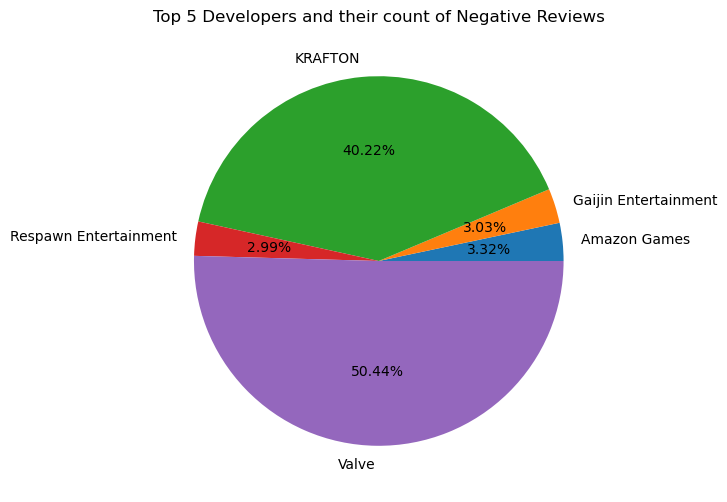

In [39]:
# Sort games by 'Estimated_Owners' to get the most popular games
games_with_most_Users = steam_games.sort_values(by='Estimated_Owners', ascending=False)

# Select the top 5 games with the most users
top_games_with_most_Users = games_with_most_Users.head(7)

# Aggregate negative reviews by developer
negative_reviews_by_developer = top_games_with_most_Users.groupby('Developers')['Negative'].sum()

# Plotting the data as a pie chart
plt.figure(figsize=(10, 6))
negative_reviews_by_developer.plot(kind='pie', autopct='%0.2f%%')
plt.title('Top 5 Developers and their count of Negative Reviews')
plt.ylabel('')  # Hide the y-label
plt.show()

### Which Games Has the highest and lowest Price ?

In [45]:
steam_games[steam_games["Price"]==0]["AppID"].count() # Taking Out the free games.

12409

In [40]:
steam_games[steam_games["Price"]>0]["AppID"].count() # Only the paid games are here.

59305

In [41]:
steam_games[steam_games["Price"]>0]["Price"].mean() # Paid Games Average

8.731280836354438

In [106]:
steam_games[steam_games["Price"]>0]["Price"].max() # Paid Games Maximum Value

999.0

In [42]:
steam_games[steam_games["Price"]==999] # The Highest Priced Game.

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre,Num_Supported_OS,Num_Supported_OS_Label
26934,1200520.0,Ascent Free-Roaming VR Experience,2019-12-27,10000.0,999.0,0.0,6.0,0.0,0.0,Fury Games,Fury Games,Single-player,English,True,False,False,Action,1,Linux


In [43]:
steam_games[steam_games["Price"]>0]["Price"].min() # The Lowest Price Of the Game.

0.37

In [44]:
steam_games[steam_games["Price"]==0.37] # The Lowest Priced Game.

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre,Num_Supported_OS,Num_Supported_OS_Label
68087,2252850.0,IN THE BUILDING: CATS 3,2023-01-05,0.0,0.37,0.0,0.0,0.0,10.0,Laush Dmitriy Sergeevich,Laush Studio,Single-player,English,True,False,False,Casual,1,Linux


We have 12,409 games that are free of cost. Out of 71,716 games, 59,305 are paid games with an average price of around $8.73.

The highest priced game is "Ascent Free-Roaming VR Experience," with a price tag of $999. It was developed and published by Fury Games for Windows only on 2019-12-27.

The lowest priced game is "IN THE BUILDING: CATS 3," with a price tag of only $0.37. It was developed by Laush Dmitriy Sergeevich and published by Laush Studio for Windows only on 2023-01-05.

### Who is the most Popular Developer ?

In [120]:
steam_games.groupby("Developers")[["Estimated_Owners","Positive","Negative"]].sum().sort_values(by="Estimated_Owners",ascending=False).head(5)
# Top Most Popular Developers and their Positive and Negative Reviews.

,Estimated_Owners,Positive,Negative
Developers,,,
Valve,573070000.0,10249446.0,1217375.0
KRAFTON,75750000.0,1157216.0,896790.0
Amazon Games,75000000.0,154914.0,73900.0
Ubisoft Montreal,71860000.0,2697398.0,516381.0
Facepunch Studios,70120000.0,1527225.0,137407.0


In [116]:
steam_games[steam_games["Developers"]=="Valve"].sort_values(by="Estimated_Owners",ascending=False).head(5)
# The Developers Valve and some of their Most Popular Games.

,AppID,Games,Relesed_Date,Estimated_Owners,Price,DLC_count,Positive,Negative,Achievements,Developers,Publishers,Category,Language,Windows,Mac,Linux,Genre,Num_Supported_OS,Num_Supported_OS_Label
17584,570.0,Dota 2,2013-07-09,150000000.0,0.00,2.0,1477153.0,300437.0,0.0,Valve,Valve,Multi-player,Bulgarian,True,True,True,Action,3,Windows
46156,730.0,Counter-Strike: Global Offensive,2012-08-21,75000000.0,0.00,1.0,5764420.0,766677.0,167.0,Valve,Valve,Multi-player,Czech,True,True,True,Action,3,Windows
30581,440.0,Team Fortress 2,2007-10-10,75000000.0,0.00,1.0,823693.0,56683.0,520.0,Valve,Valve,Multi-player,English,True,True,True,Action,3,Windows
39528,550.0,Left 4 Dead 2,2009-11-16,35000000.0,9.99,0.0,619457.0,16204.0,101.0,Valve,Valve,Single-player,Danish,True,True,True,Action,3,Windows
57192,340.0,Half-Life 2: Lost Coast,2005-10-27,35000000.0,0.00,0.0,9306.0,1261.0,0.0,Valve,Valve,Single-player,English,True,True,True,Action,3,Windows




The biggest developer is Valve, with over 573 million users globally. Their game DOTA 2 is very popular worldwide, with 150 million users. It is a multiplayer action game released on 2013-07-09 and is available for all operating systems.

Valve dominates the top of the chart, with Amazon Games and Krafton Games also in the top three list, though they each have only around 75 million users.

In [124]:
steam_games.groupby("Publishers")[["Estimated_Owners","Positive","Negative"]].sum().sort_values(by="Estimated_Owners",ascending=False).head(5)
# Top Most Popular Publishers with their users , Positive and Negative Reviews.

,Estimated_Owners,Positive,Negative
Publishers,,,
Valve,629870000.0,11092767.0,1246814.0
Ubisoft,165640000.0,3665837.0,734166.0
Electronic Arts,145315000.0,1800483.0,415283.0
SEGA,140280000.0,1318067.0,228386.0
2K,123360000.0,1562862.0,257861.0


The biggest publisher is Valve, with over 629.87 million users globally. In the top five, there are also Ubisoft, Electronic Arts, Sega, and 2K, each having nearly 120-160 million users worldwide.

### Top 5 Most Popular Genres ?

In [108]:
steam_games.groupby("Genre")["Estimated_Owners"].sum().sort_values(ascending=False).head(5) # Taking The Most Popular Genres.

Genre
Action       4.456840e+09
Adventure    7.798600e+08
Casual       5.022600e+08
Indie        4.129100e+08
Strategy     1.921350e+08
Name: Estimated_Owners, dtype: float64

Action games are most popular with a huge fan base of 4.45 billion gamers at top of the chart but Adventure , casual, Indie games are also very popular with 779,502,412 million players world wide respectively.

### Top 5 Least Popular Genres ?

In [129]:
steam_games.groupby("Genre")["Estimated_Owners"].sum().sort_values(ascending=True).head(5) # Taking The least Popular Genres.

Genre
Photo Editing       245000.0
Accounting          365000.0
Video Production    470000.0
Web Publishing      475000.0
Game Development    545000.0
Name: Estimated_Owners, dtype: float64

The games based on genres like Photo Editing, Accounting, Video Production, Web Publishing are not that popular as they have only like 300k to 500k users world wide.